In [11]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers, optimizers
from tensorflow.keras.applications import VGG16
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [12]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

train_images, test_images = train_images / 255.0, test_images / 255.0

train_images_expanded = tf.expand_dims(train_images, -1)
test_images_expanded = tf.expand_dims(test_images, -1)

In [25]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

ACC

In [26]:
def build_advanced_model():
    model = models.Sequential([
        layers.Input(shape=(28, 28, 1)),
        data_augmentation,
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(256, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.Flatten(),
        layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer=optimizers.Adam(learning_rate=0.0001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model


train_images_expanded = tf.expand_dims(train_images, -1)
test_images_expanded = tf.expand_dims(test_images, -1)


model = build_advanced_model()
history = model.fit(train_images_expanded, train_labels, epochs=70, batch_size=64, validation_data=(test_images_expanded, test_labels))


test_loss, test_acc = model.evaluate(test_images_expanded, test_labels, verbose=2)
print(f'\nТочність на тестовому наборі даних: {test_acc}')

Epoch 1/70
938/938 ━━━━━━━━━━━━━━━━━━━━ 123s 126ms/step - accuracy: 0.6082 - loss: 1.6808 - val_accuracy: 0.8040 - val_loss: 0.9944
Epoch 2/70
938/938 ━━━━━━━━━━━━━━━━━━━━ 155s 165ms/step - accuracy: 0.7619 - loss: 1.0938 - val_accuracy: 0.8278 - val_loss: 0.8972
Epoch 3/70
938/938 ━━━━━━━━━━━━━━━━━━━━ 153s 163ms/step - accuracy: 0.7959 - loss: 0.9664 - val_accuracy: 0.8413 - val_loss: 0.8182
Epoch 4/70
938/938 ━━━━━━━━━━━━━━━━━━━━ 122s 130ms/step - accuracy: 0.8173 - loss: 0.8596 - val_accuracy: 0.8432 - val_loss: 0.7637
Epoch 5/70
938/938 ━━━━━━━━━━━━━━━━━━━━ 117s 125ms/step - accuracy: 0.8307 - loss: 0.7904 - val_accuracy: 0.8566 - val_loss: 0.6954
Epoch 6/70
938/938 ━━━━━━━━━━━━━━━━━━━━ 118s 126ms/step - accuracy: 0.8384 - loss: 0.7302 - val_accuracy: 0.8557 - val_loss: 0.6647
Epoch 7/70
938/938 ━━━━━━━━━━━━━━━━━━━━ 116s 124ms/step - accuracy: 0.8491 - loss: 0.6648 - val_accuracy: 0.8359 - val_loss: 0.6879
Epoch 8/70
938/938 ━━━━━━━━━━━━━━━━━━━━ 166s 176ms/step - accuracy: 0.8596 -

Згорткова нейромережа (CNN)

In [27]:
def build_cnn_model():
    model = models.Sequential([
        layers.Input(shape=(28, 28, 1)),
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(256, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer=optimizers.Adam(learning_rate=0.0001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

cnn_model = build_cnn_model()
history_cnn = cnn_model.fit(train_images_expanded, train_labels, epochs=60, batch_size=64, validation_data=(test_images_expanded, test_labels))

test_loss_cnn, test_acc_cnn = cnn_model.evaluate(test_images_expanded, test_labels, verbose=2)
print(f'\nТочність на тестовому наборі даних (CNN): {test_acc_cnn}')

Epoch 1/60
938/938 ━━━━━━━━━━━━━━━━━━━━ 110s 112ms/step - accuracy: 0.6326 - loss: 1.4327 - val_accuracy: 0.8296 - val_loss: 0.7354
Epoch 2/60
938/938 ━━━━━━━━━━━━━━━━━━━━ 120s 128ms/step - accuracy: 0.8084 - loss: 0.7909 - val_accuracy: 0.8508 - val_loss: 0.6519
Epoch 3/60
938/938 ━━━━━━━━━━━━━━━━━━━━ 123s 132ms/step - accuracy: 0.8398 - loss: 0.6785 - val_accuracy: 0.8644 - val_loss: 0.5957
Epoch 4/60
938/938 ━━━━━━━━━━━━━━━━━━━━ 132s 140ms/step - accuracy: 0.8583 - loss: 0.6107 - val_accuracy: 0.8762 - val_loss: 0.5584
Epoch 5/60
938/938 ━━━━━━━━━━━━━━━━━━━━ 124s 133ms/step - accuracy: 0.8699 - loss: 0.5639 - val_accuracy: 0.8814 - val_loss: 0.5232
Epoch 6/60
938/938 ━━━━━━━━━━━━━━━━━━━━ 125s 133ms/step - accuracy: 0.8801 - loss: 0.5191 - val_accuracy: 0.8863 - val_loss: 0.4839
Epoch 7/60
938/938 ━━━━━━━━━━━━━━━━━━━━ 126s 134ms/step - accuracy: 0.8897 - loss: 0.4785 - val_accuracy: 0.8931 - val_loss: 0.4613
Epoch 8/60
938/938 ━━━━━━━━━━━━━━━━━━━━ 122s 130ms/step - accuracy: 0.8970 -

Згорткова нейромережа з використанням VGG16

In [29]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

train_images_expanded_vgg = tf.image.grayscale_to_rgb(tf.image.resize(train_images_expanded, (32, 32)))
test_images_expanded_vgg = tf.image.grayscale_to_rgb(tf.image.resize(test_images_expanded, (32, 32)))


for layer in base_model.layers[:15]:
    layer.trainable = False

def build_vgg16_model():
    model = models.Sequential([
        base_model,
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer=optimizers.Adam(learning_rate=0.0001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

vgg16_model = build_vgg16_model()
history_vgg16 = vgg16_model.fit(train_images_expanded_vgg, train_labels, epochs=5, batch_size=64, validation_data=(test_images_expanded_vgg, test_labels))

test_loss_vgg16, test_acc_vgg16 = vgg16_model.evaluate(test_images_expanded_vgg, test_labels, verbose=2)
print(f'\nТочність на тестовому наборі даних (VGG16): {test_acc_vgg16}')

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 849s 899ms/step - accuracy: 0.7851 - loss: 0.6498 - val_accuracy: 0.8676 - val_loss: 0.3764
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 602s 642ms/step - accuracy: 0.8794 - loss: 0.3417 - val_accuracy: 0.8808 - val_loss: 0.3395
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 575s 613ms/step - accuracy: 0.9025 - loss: 0.2777 - val_accuracy: 0.8925 - val_loss: 0.3020
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 575s 613ms/step - accuracy: 0.9071 - loss: 0.2586 - val_accuracy: 0.8989 - val_loss: 0.2962
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 644s 687ms/step - accuracy: 0.9179 - loss: 0.2338 - val_accuracy: 0.8974 - val_loss: 0.3074
313/313 - 46s - 148ms/step - accuracy: 0.8974 - loss: 0.3074

Точність на тестовому наборі даних (VGG16): 0.8974000215530396


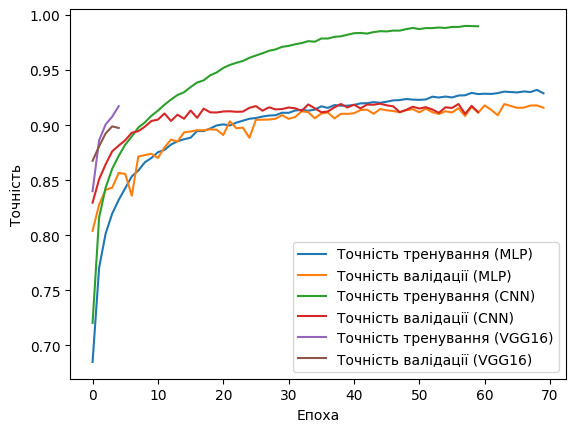


Точність на тестовому наборі даних (MLP): 0.9157999753952026

Точність на тестовому наборі даних (CNN): 0.9118000268936157

Точність на тестовому наборі даних (VGG16): 0.8974000215530396


In [32]:

plt.plot(history.history['accuracy'], label='Точність тренування (MLP)')
plt.plot(history.history['val_accuracy'], label='Точність валідації (MLP)')
plt.plot(history_cnn.history['accuracy'], label='Точність тренування (CNN)')
plt.plot(history_cnn.history['val_accuracy'], label='Точність валідації (CNN)')
plt.plot(history_vgg16.history['accuracy'], label='Точність тренування (VGG16)')
plt.plot(history_vgg16.history['val_accuracy'], label='Точність валідації (VGG16)')
plt.xlabel('Епоха')
plt.ylabel('Точність')
plt.legend(loc='lower right')
plt.show()

print(f'\nТочність на тестовому наборі даних (MLP): {test_acc}')
print(f'\nТочність на тестовому наборі даних (CNN): {test_acc_cnn}')
print(f'\nТочність на тестовому наборі даних (VGG16): {test_acc_vgg16}')